In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread
import matplotlib.cbook as cbook
from PIL import Image

data = pd.read_csv("kc_house_data.csv")
data = data.drop_duplicates(subset=('id','lat','long','price'), keep='first')
data['lat_group'] = ''
data['long_group']=''

heat_data = pd.concat([data['price'], data['long'], data['lat']], axis=1, keys=['price', 'long','lat'])
heat_data = heat_data.reset_index()
heat_data = heat_data.groupby(['lat', 'long']).mean()
heat_data = heat_data.reset_index()
heat_data.head()

,lat,long,index,price
0,47.1559,-121.646,3295.0,380000.0
1,47.1593,-121.957,15599.0,687000.0
2,47.1622,-121.971,13006.0,750000.0
3,47.1647,-121.973,12669.0,335000.0
4,47.1764,-122.026,7719.0,245000.0


In [167]:
max_price = max(data['price'])
min_price = min(data['price'])
print('max_price: ', max_price)
print('min_price: ', min_price)

max_price:  7700000.0
min_price:  75000.0


In [252]:
heat = heat_data.pivot(index="lat", columns="long", values="price")
#datafile = cbook.get_sample_data('kings_County.jpg')
img = imread('kings_County.PNG')

plt.subplots(figsize=(15,10))
plt.title('Price Heat Map')

ax = sns.heatmap(data=heat,vmin=min_price, vmax=600000,cmap="gist_rainbow") #gist_rainbow
ax.invert_yaxis()

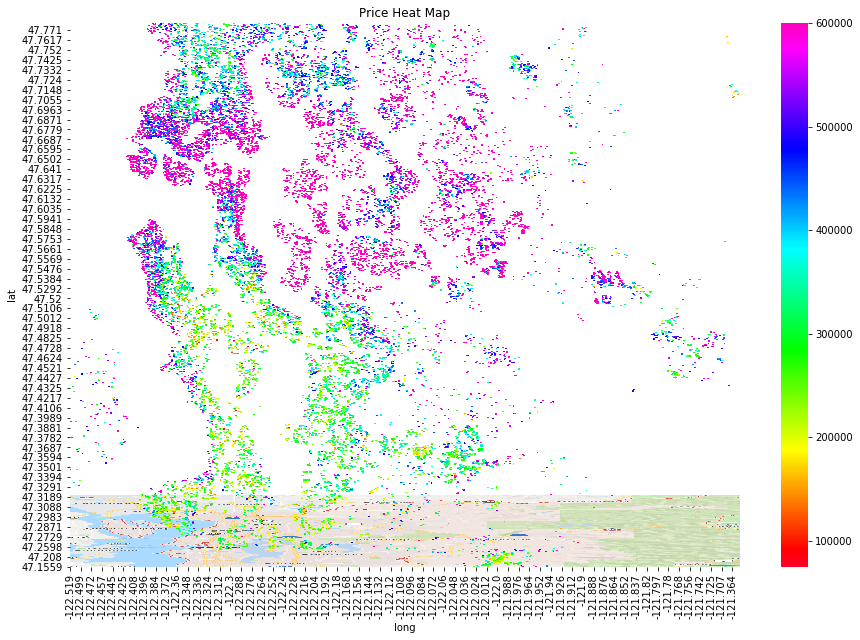

In [253]:
plt.imshow(img,interpolation='none', aspect='auto')
plt.show()

In [155]:
import scipy.ndimage
height, width, channels = scipy.ndimage.imread('kings_County.PNG').shape
img = img.resize(int(10*width), int(10*height), Image.ANTIALIAS)

In [185]:
img = img.resize(int(10*width), int(10*height), Image.ANTIALIAS)

In [156]:
height

665

In [157]:
width

982

In [158]:
extent=[-122.519, -121.364, 47.771, 47.1559]

4

In [187]:
plt.imshow(img, zorder=0, alpha=0.5,aspect='auto')
plt.show()

TypeError: Image data can not convert to float

In [ ]:
import scipy.ndimage
height, width, channels = scipy.ndimage.imread('kings_County.PNG').shape
new_height = 10*height
new_width = 10*width
img = img.resize(new_width,new_height, Image.ANTIALIAS)